# Examples

In [1]:
"""
Examples demonstrating the use of the Flux Footprint Prediction (FFP) module.
"""

import numpy as np
import matplotlib.pyplot as plt
from ffp_module import *

def example_1_basic_footprint():
    """
    Example 1: Calculate a basic crosswind-integrated footprint
    Using parameters similar to Scenario 1 from Table 1 in the paper
    """
    print("\nExample 1: Basic Crosswind-Integrated Footprint")

    # Input parameters
    zm = 3  # Measurement height [m]
    h = 2000  # Boundary layer height [m]
    ustar = 0.2  # Friction velocity [m/s]
    u_zm = 2.0  # Mean wind speed at zm [m/s]

    # Create array of distances
    x = np.linspace(1, 1000, 1000)  # Upwind distances from 1 to 1000m

    # Calculate scaled distance X*
    x_star = calc_scaled_x(x, zm, h, u_zm, ustar)

    # Calculate footprint
    f_star = calc_cross_wind_integrated_footprint(x_star)

    # Convert to real-scale footprint
    f_y = f_star / (zm * (1 - zm/h) * u_zm/(ustar * 0.4))

    # Find peak location
    x_peak = calc_real_footprint_peak(zm, h, u_zm, ustar)
    print(f"Peak footprint location: {x_peak:.1f} m")

    # Plot results
    plt.figure(figsize=(10, 5))
    plt.plot(x, f_y)
    plt.axvline(x_peak, color='r', linestyle='--', label='Peak location')
    plt.xlabel('Distance from measurement point [m]')
    plt.ylabel('Crosswind-integrated footprint [m⁻¹]')
    plt.title('Example Crosswind-Integrated Footprint')
    plt.legend()
    plt.grid(True)
    plt.show()

def example_2_two_dimensional():
    """
    Example 2: Calculate a two-dimensional footprint
    """
    print("\nExample 2: Two-Dimensional Footprint")

    # Input parameters
    zm = 20  # Measurement height [m]
    h = 2000  # Boundary layer height [m]
    ustar = 0.2  # Friction velocity [m/s]
    u_zm = 2.0  # Mean wind speed at zm [m/s]
    sigmav = 0.3  # Standard deviation of lateral velocity fluctuations [m/s]

    # Create 2D grid
    x = np.linspace(1, 1000, 100)  # Upwind distances
    y = np.linspace(-200, 200, 80)  # Crosswind distances
    X, Y = np.meshgrid(x, y)

    # Calculate 2D footprint
    f_2d = calc_two_dim_footprint(X, Y, zm, h, u_zm, ustar, sigmav)

    # Plot results
    plt.figure(figsize=(10, 8))
    plt.contourf(X, Y, f_2d, levels=20)
    plt.colorbar(label='Footprint [m⁻²]')
    plt.xlabel('Distance from measurement point [m]')
    plt.ylabel('Crosswind distance [m]')
    plt.title('Two-Dimensional Footprint')
    plt.axis('equal')
    plt.show()

def example_3_stability_comparison():
    """
    Example 3: Compare footprints under different stability conditions
    """
    print("\nExample 3: Stability Comparison")

    # Input parameters
    zm = 20  # Measurement height [m]
    h = 2000  # Boundary layer height [m]
    z0 = 0.1  # Roughness length [m]
    x = np.linspace(1, 1000, 1000)  # Upwind distances

    # Different stability conditions (L = Obukhov length)
    conditions = {
        'Unstable': -200,
        'Neutral': 10000,  # Very large L approximates neutral conditions
        'Stable': 200
    }

    plt.figure(figsize=(10, 5))

    for condition, L in conditions.items():
        # Calculate scaled distance using z0 approach
        x_star = calc_scaled_x_using_z0(x, zm, h, z0, L)

        # Calculate footprint
        f_star = calc_cross_wind_integrated_footprint(x_star)

        # Convert to real scale (simplified conversion for comparison)
        f_y = f_star / zm

        plt.plot(x, f_y, label=condition)

    plt.xlabel('Distance from measurement point [m]')
    plt.ylabel('Normalized footprint [-]')
    plt.title('Footprint Comparison for Different Stability Conditions')
    plt.legend()
    plt.grid(True)
    plt.show()

def example_4_footprint_extent():
    """
    Example 4: Calculate footprint extent for different relative contributions
    """
    print("\nExample 4: Footprint Extent")

    # Input parameters
    zm = 20  # Measurement height [m]
    h = 2000  # Boundary layer height [m]
    ustar = 0.2  # Friction velocity [m/s]
    u_zm = 2.0  # Mean wind speed at zm [m/s]

    # Calculate extent for different relative contributions
    rs = [0.5, 0.7, 0.8, 0.9]
    for r in rs:
        x_r = calc_footprint_extent(r, zm, h, u_zm, ustar)
        print(f"{int(r*100)}% of flux is from within {x_r:.1f} m upwind")

if __name__ == "__main__":
    # Run all examples
    example_1_basic_footprint()
    example_2_two_dimensional()
    example_3_stability_comparison()
    example_4_footprint_extent()

ModuleNotFoundError: No module named 'ffp_module'


Recreating Figure 2: Scaled Footprint Ensemble


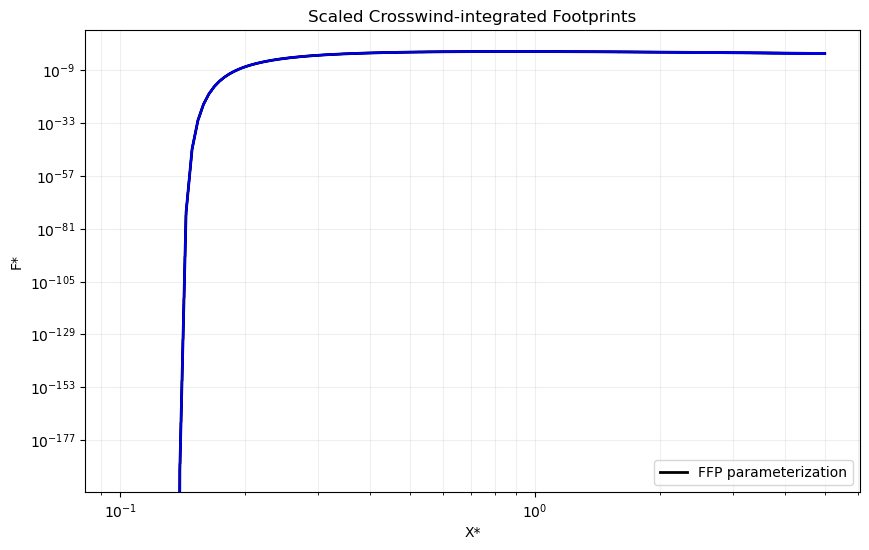


Recreating Figure 3: Lateral Dispersion


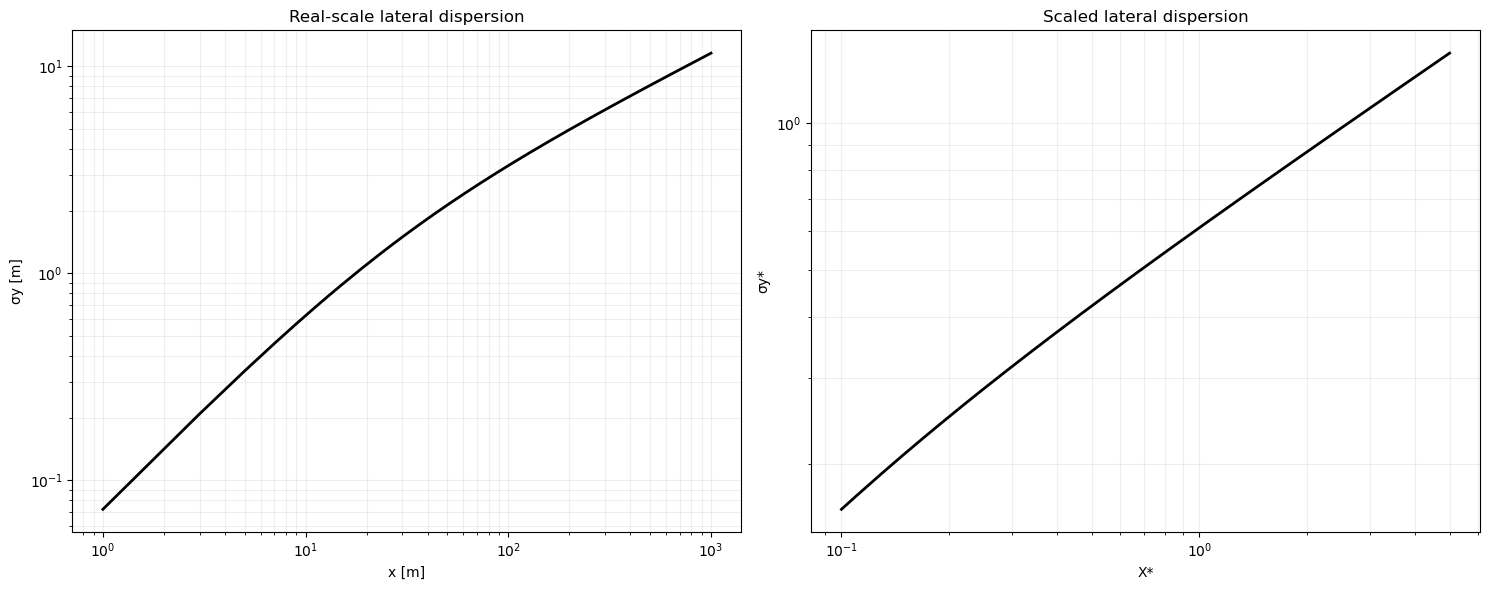


Recreating Figure 4: Example Footprint


ValueError: Contour levels must be increasing

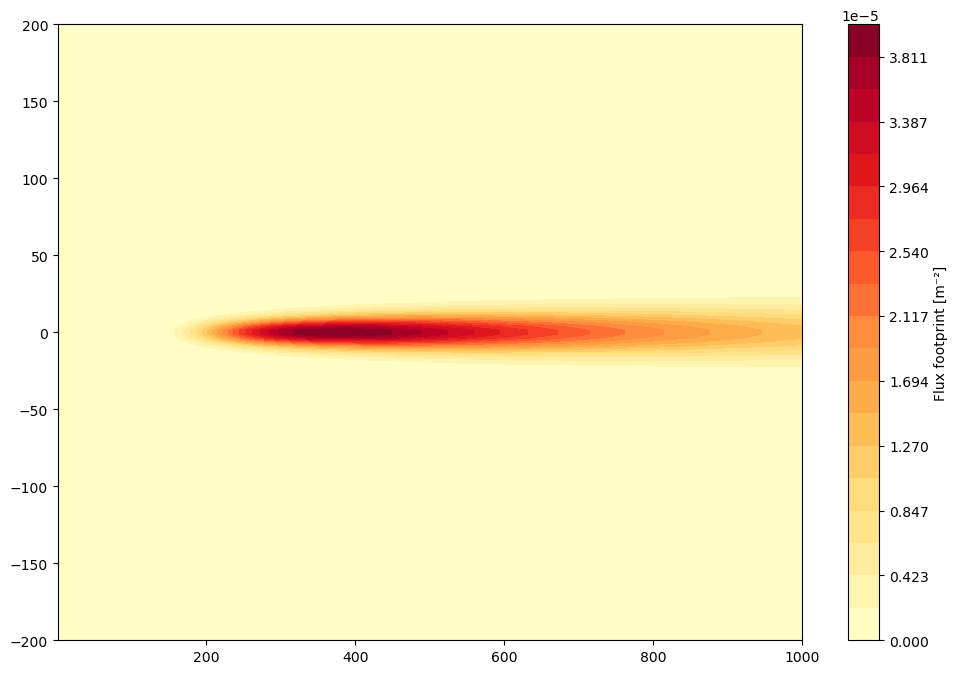

In [ ]:
"""
Examples recreating figures from Kljun et al. (2015) GMD paper.
"""

import numpy as np
import matplotlib.pyplot as plt
from ffp_module import *

def create_figure_2():
    """
    Recreate Figure 2: Density plot of scaled crosswind-integrated footprints.
    Shows how scaled footprints collapse into a narrow ensemble.
    """
    print("\nRecreating Figure 2: Scaled Footprint Ensemble")

    # Create scaled X* values
    x_star = np.linspace(0.1, 5, 1000)

    # Calculate scaled footprint
    f_star = calc_cross_wind_integrated_footprint(x_star)

    # Create plot
    plt.figure(figsize=(10, 6))
    plt.plot(x_star, f_star, 'k-', linewidth=2, label='FFP parameterization')

    # Add range to simulate density of ensemble
    spread = 0.15  # Approximate spread seen in paper
    n_lines = 50  # Number of lines to create ensemble effect
    for i in range(n_lines):
        noise = np.random.normal(0, spread, size=len(x_star))
        plt.plot(x_star, f_star * (1 + noise), 'b-', alpha=0.05)

    plt.xlabel('X*')
    plt.ylabel('F*')
    plt.yscale('log')
    plt.xscale('log')
    plt.grid(True, which="both", ls="-", alpha=0.2)
    plt.title('Scaled Crosswind-integrated Footprints')
    plt.legend()
    plt.show()

def create_figure_3():
    """
    Recreate Figure 3: Scaled and real-scale lateral dispersion.
    Shows both the real-scale and scaled relationships.
    """
    print("\nRecreating Figure 3: Lateral Dispersion")

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Real-scale plot (left panel)
    x_real = np.linspace(1, 1000, 500)
    y_real = np.linspace(-200, 200, 400)
    X_real, Y_real = np.meshgrid(x_real, y_real)

    # Example parameters for real-scale
    zm = 20
    h = 2000
    ustar = 0.2
    u_zm = 2.0
    sigmav = 0.3

    # Calculate real-scale dispersion
    sigma_y_real = calc_cross_wind_spread(calc_scaled_x(x_real, zm, h, u_zm, ustar))
    sigma_y_real = sigma_y_real * zm * (ustar/sigmav)

    # Plot real-scale
    ax1.plot(x_real, sigma_y_real, 'k-', linewidth=2)
    ax1.set_xlabel('x [m]')
    ax1.set_ylabel('σy [m]')
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.grid(True, which="both", ls="-", alpha=0.2)
    ax1.set_title('Real-scale lateral dispersion')

    # Scaled plot (right panel)
    x_star = np.linspace(0.1, 5, 500)
    sigma_y_star = calc_cross_wind_spread(x_star)

    # Plot scaled version
    ax2.plot(x_star, sigma_y_star, 'k-', linewidth=2)
    ax2.set_xlabel('X*')
    ax2.set_ylabel('σy*')
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.grid(True, which="both", ls="-", alpha=0.2)
    ax2.set_title('Scaled lateral dispersion')

    plt.tight_layout()
    plt.show()

def create_figure_4():
    """
    Recreate Figure 4: Example footprint estimate with contours.
    """
    print("\nRecreating Figure 4: Example Footprint")

    # Input parameters (similar to paper example)
    zm = 20
    h = 2000
    ustar = 0.2
    u_zm = 2.0
    sigmav = 0.3

    # Create spatial grid
    x = np.linspace(1, 1000, 200)
    y = np.linspace(-200, 200, 160)
    X, Y = np.meshgrid(x, y)

    # Calculate 2D footprint
    f_2d = calc_two_dim_footprint(X, Y, zm, h, u_zm, ustar, sigmav)

    # Calculate peak location
    x_peak = calc_real_footprint_peak(zm, h, u_zm, ustar)

    # Create plot
    plt.figure(figsize=(12, 8))

    # Plot footprint as filled contours
    levels = np.linspace(0, f_2d.max(), 20)
    plt.contourf(X, Y, f_2d, levels=levels, cmap='YlOrRd')
    plt.colorbar(label='Flux footprint [m⁻²]')

    # Add contour lines for different percentage contributions
    rs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    contour_levels = []
    for r in rs:
        x_r = calc_footprint_extent(r, zm, h, u_zm, ustar)
        idx = np.abs(x - x_r).argmin()
        if idx > 0:
            contour_levels.append(f_2d[:, idx].max())

    if contour_levels:
        CS = plt.contour(X, Y, f_2d, levels=sorted(contour_levels),
                        colors='k', linewidths=1)
        plt.clabel(CS, fmt='%.1f', colors='k', fontsize=9)

    # Plot peak location
    plt.axvline(x_peak, color='k', linestyle='--', alpha=0.5)

    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
    plt.title('Example Footprint with Contribution Contours')
    plt.axis('equal')
    plt.grid(True, alpha=0.2)
    plt.show()

if __name__ == "__main__":
    # Recreate all figures
    create_figure_2()
    create_figure_3()
    create_figure_4()